### Importing the packages


In [ ]:
from imblearn.over_sampling import SMOTE
from scipy.stats import norm
import pandas as pd # data processing
import numpy as np # working with arrays
from numpy import where
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import itertools # construct specialized tools
import matplotlib.pyplot as plt # visualizations
from matplotlib import rcParams # plot size customization
from termcolor import colored as cl # text customization
from sklearn.linear_model import LogisticRegression # model algorithm
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.metrics import jaccard_score as jss # evaluation metric
from sklearn.metrics import precision_score # evaluation metric
from sklearn.metrics import classification_report # evaluation metric
from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import log_loss # evaluation metric
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from collections import Counter

### Importing and cleaning the data

In [ ]:
train_data = pd.read_csv('DBS.csv', sep=';')
test_data = pd.read_csv('DBS_2020.csv', sep=';')
train_data.head()

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year
0,1256,57.00,A,19,91.54,A,40.0,189.92,A,1,2019,2019/2020
1,985,42.87,B,19,75.96,A,13.7,189.43,A,1,2017,2017/2018
2,1455,54.50,A,16,96.79,A,40.0,188.91,A,1,2019,2019/2020
3,998,54.50,A,16,93.36,A,40.0,186.85,A,1,2019,2019/2020
4,1347,55.00,A,16,92.86,A,39.0,186.38,A,1,2019,2019/2020


In [ ]:
test_data.head()

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year
0,794,68.10,A,19.40,100.23,A,37,235.34,A,1,2020,2020/2021
1,844,57.85,C,12.57,96.14,A,32,215.75,B,1,2020,2020/2021
2,658,64.60,B,17.57,101.59,A,37,224.27,B,1,2020,2020/2021
3,1193,56.93,C,13.28,102.31,A,36,216.56,B,1,2020,2020/2021
4,1400,61.35,C,15.40,93.72,B,34,214.72,B,1,2020,2020/2021


In [ ]:
print(train_data.shape)
print(test_data.shape)
print(list(train_data.columns))

(261, 12)
(60, 12)
['access', 'tests', 'tests_grade', 'exam', 'project', 'project_grade', 'assignments', 'result_points', 'result_grade', 'graduate', 'year', 'acad_year']


In [ ]:
train_data['graduate'].value_counts()

1    210
0     51
Name: graduate, dtype: int64

In [ ]:
test_data['graduate'].value_counts()

1    46
0    14
Name: graduate, dtype: int64

In [ ]:
X_train = np.asarray(train_data[['access', 'tests', 'assignments']])
y_train = np.asarray(train_data['graduate'])

print(cl('X_var samples : ', attrs = ['bold']), X_train[:5])
print(cl('y_var samples : ', attrs = ['bold']), y_train[:5])

X_var samples :  [[1256.     57.     40.  ]
 [ 985.     42.87   13.7 ]
 [1455.     54.5    40.  ]
 [ 998.     54.5    40.  ]
 [1347.     55.     39.  ]]
y_var samples :  [1 1 1 1 1]


In [ ]:
X_test = np.asarray(test_data[['access', 'tests', 'assignments']])
y_test = np.asarray(test_data['graduate'])

print(cl('X_var samples : ', attrs = ['bold']), X_test[:5])
print(cl('y_var samples : ', attrs = ['bold']), y_test[:5])

X_var samples :  [[ 794.     68.1    37.  ]
 [ 844.     57.85   32.  ]
 [ 658.     64.6    37.  ]
 [1193.     56.93   36.  ]
 [1400.     61.35   34.  ]]
y_var samples :  [1 1 1 1 1]


#### Data normalization with sklearn

In [ ]:
from sklearn import preprocessing
standardized_X = preprocessing.scale(X_test)
df = pd.DataFrame(standardized_X)
df.describe()

,0,1,2
count,6.000000e+01,6.000000e+01,6.000000e+01
mean,-1.850372e-17,4.218847e-16,1.591320e-16
std,1.008439e+00,1.008439e+00,1.008439e+00
min,-2.201088e+00,-2.870371e+00,-2.841506e+00
25%,-5.506751e-01,-6.288193e-01,-8.207221e-01
50%,-1.676396e-01,3.510590e-01,2.428486e-01
75%,5.836475e-01,7.641450e-01,8.809911e-01
max,2.820037e+00,1.491048e+00,1.306419e+00


### Summarize class distribution

Counter({1: 210, 0: 51})


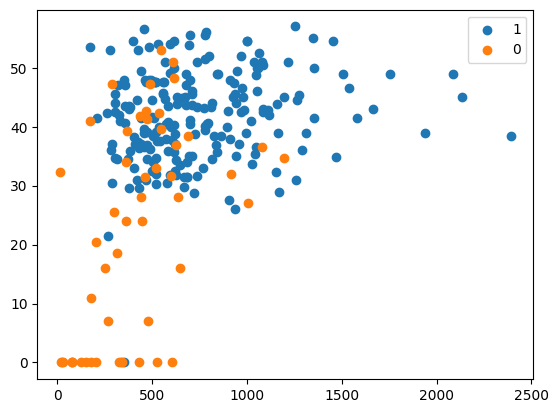

In [ ]:
counter = Counter(y_train)
print(counter)

for label, _ in counter.items():
	row_ix = where(y_train == label)[0]
	plt.scatter(X_train[row_ix, 0], X_train[row_ix, 1], label=str(label))
plt.legend()
plt.show()

### Transform the dataset

In [ ]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

### Summarize the new class distribution

In [ ]:
counter = Counter(y_train_res)
print(counter)

Counter({1: 210, 0: 210})


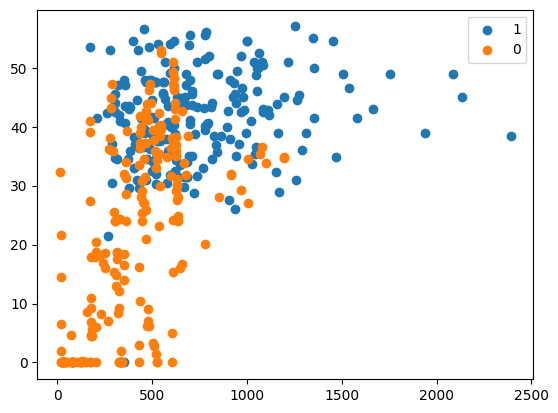

In [ ]:
for label, _ in counter.items():
	row_ix = where(y_train_res == label)[0]
	plt.scatter(X_train_res[row_ix, 0], X_train_res[row_ix, 1], label=str(label))
plt.legend()
plt.show()

### Modelling

## LOGISTIC REGRESSION

In [ ]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res)
print(cl(lr1, attrs = ['bold']))

LogisticRegression()


### Evaluate pipeline

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
scores = cross_val_score(lr1, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.979


### Predictions

In [ ]:
yhat = lr1.predict(X_test)
yhat_prob = lr1.predict_proba(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
def evaluate(lr1, x_scaled, y_test):
    predictions = lr1.predict(x_scaled)
    errors = abs(predictions - y_test)
    mape = mean_absolute_error(predictions, y_test)*100
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

In [ ]:
base_accuracy = evaluate(lr1, X_test, y_test)

Model Performance
Average Error: 0.0667 degrees.
Accuracy = 93.33%.


In [ ]:
print(y_test)
print(yhat)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0]


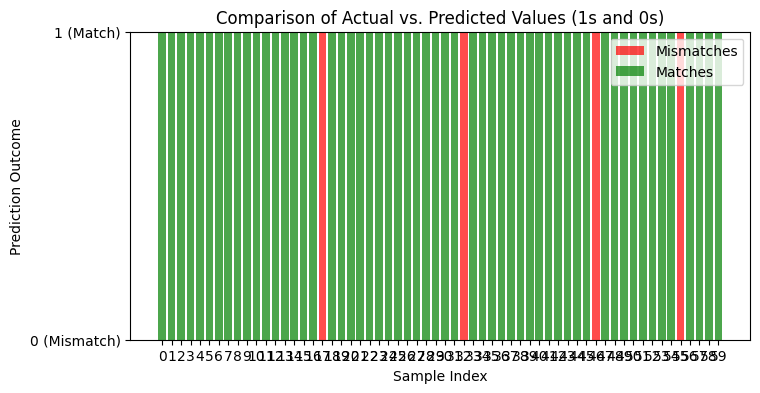

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample actual and predicted values (replace with your own)
y_test = np.array([1 ,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0, 0, 0, 0, 0, 0])
yhat = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

# Create an array to represent matches (where actual and predicted values are the same)
matches = (y_test == yhat)

# Create an array to represent mismatches
mismatches = (y_test != yhat)

# Calculate the total number of samples
total_samples = len(y_test)

# Calculate the number of matches and mismatches
num_matches = np.sum(matches)
num_mismatches = np.sum(mismatches)

# Create a stacked bar chart
plt.figure(figsize=(8, 4))
plt.bar(range(total_samples), mismatches, color='red', label='Mismatches', alpha=0.7)
plt.bar(range(total_samples), matches, color='green', label='Matches', bottom=mismatches, alpha=0.7)

# Customize the plot
plt.xlabel('Sample Index')
plt.ylabel('Prediction Outcome')
plt.title('Comparison of Actual vs. Predicted Values (1s and 0s)')
plt.xticks(range(total_samples))
plt.yticks([0, 1], ['0 (Mismatch)', '1 (Match)'])
plt.legend(loc='upper right')

# Show the plot
plt.show()


### Classificaton report

In [ ]:
print(cl(classification_report(y_test, yhat), attrs = ['bold']))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.96      0.96      0.96        46

    accuracy                           0.93        60
   macro avg       0.91      0.91      0.91        60
weighted avg       0.93      0.93      0.93        60



### Confusion matrix

Recall metric in the testing dataset: 95.65217391304348%


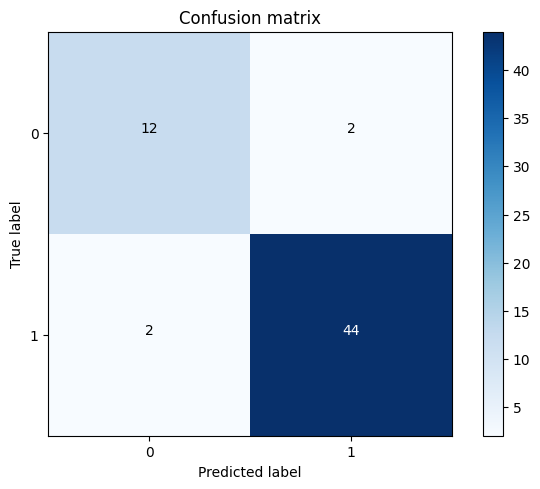

In [ ]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

### Import the metrics class

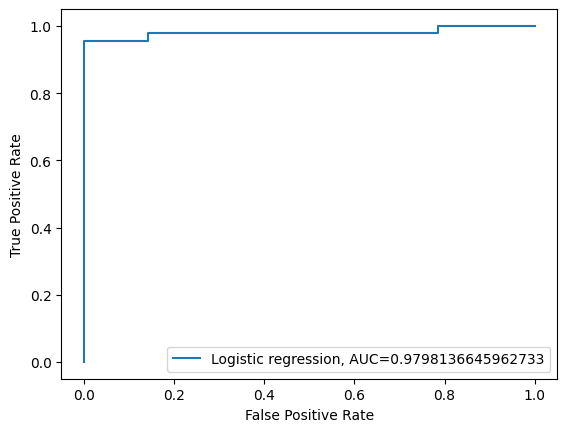

In [ ]:
from sklearn import metrics
y_pred_proba = lr1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr,tpr,label="Logistic regression, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
lr1 = smf.logit("graduate ~ access + assignments + tests", data=train_data)
results = lr1.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.309274
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               graduate   No. Observations:                  261
Model:                          Logit   Df Residuals:                      257
Method:                           MLE   Df Model:                            3
Date:                Fri, 29 Sep 2023   Pseudo R-squ.:                  0.3739
Time:                        03:03:54   Log-Likelihood:                -80.721
converged:                       True   LL-Null:                       -128.92
Covariance Type:            nonrobust   LLR p-value:                 9.203e-21
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -3.8061      0.790     -4.817      0.000      -5.355      -2.257
access          0.0015      0.001      1.642      0.101      -0.000       0.003
assignments     0.0530      0.033      1.623      0.105      -0.011       0.117
tests           0.1028      0.020      5.092      0.000       0.063       0.142
===============================================================================
"""

## DECISION *TREE*

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

### Evaluate pipeline

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=4)
scores = cross_val_score(clf, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.951


### Transform the dataset

In [ ]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

### Summarize the new class distribution

In [ ]:
counter = Counter(y_train)
print(counter)

Counter({1: 210, 0: 210})


###Evaluate pipeline

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
scores = cross_val_score(clf, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.968


### Predictions

In [ ]:
yhat = clf.predict(X_test)
yhat_prob = clf.predict_proba(X_test)

### Model Accuracy

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, yhat))

Accuracy: 0.9333333333333333


In [ ]:
print(y_test)
print(yhat)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0]


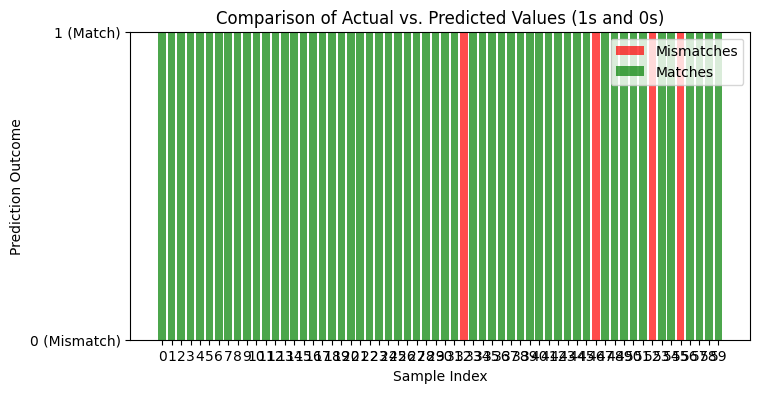

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample actual and predicted values (replace with your own)
y_test = np.array([1 ,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0, 0, 0, 0, 0, 0])
yhat = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ,1 ,1 ,1 ,1 ,1 ,1 ,1, 1, 0, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1 ,1 ,1 ,0 ,0, 0, 0, 0, 1 ,0 ,0 ,1 ,0 ,0 ,0, 0])

# Create an array to represent matches (where actual and predicted values are the same)
matches = (y_test == yhat)

# Create an array to represent mismatches
mismatches = (y_test != yhat)

# Calculate the total number of samples
total_samples = len(y_test)

# Calculate the number of matches and mismatches
num_matches = np.sum(matches)
num_mismatches = np.sum(mismatches)

# Create a stacked bar chart
plt.figure(figsize=(8, 4))
plt.bar(range(total_samples), mismatches, color='red', label='Mismatches', alpha=0.7)
plt.bar(range(total_samples), matches, color='green', label='Matches', bottom=mismatches, alpha=0.7)

# Customize the plot
plt.xlabel('Sample Index')
plt.ylabel('Prediction Outcome')
plt.title('Comparison of Actual vs. Predicted Values (1s and 0s)')
plt.xticks(range(total_samples))
plt.yticks([0, 1], ['0 (Mismatch)', '1 (Match)'])
plt.legend(loc='upper right')

# Show the plot
plt.show()

### Classificaton report

In [ ]:
from sklearn.metrics import classification_report # evaluation metric
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.94      0.98      0.96        46

    accuracy                           0.93        60
   macro avg       0.93      0.88      0.90        60
weighted avg       0.93      0.93      0.93        60



### Confusion matrix

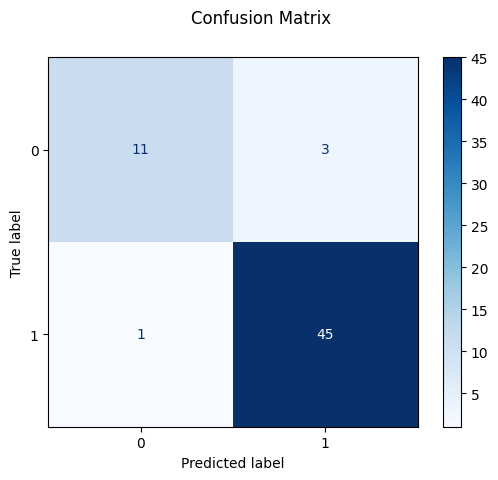

Confusion matrix:
[[11  3]
 [ 1 45]]


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the confusion matrix display with a custom colormap
dis = ConfusionMatrixDisplay.from_predictions(y_test, yhat, cmap=plt.cm.Blues)  # You can choose any other colormap

# Set the title
dis.figure_.suptitle("Confusion Matrix")

# Show the confusion matrix
plt.show()

# Print the confusion matrix
print(f"Confusion matrix:\n{dis.confusion_matrix}")


### Import the metrics class

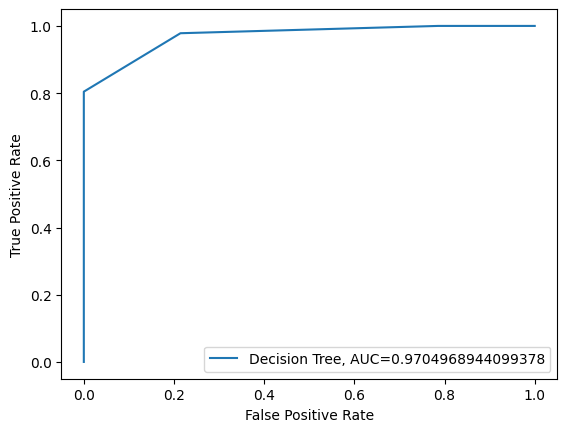

In [ ]:
from sklearn import metrics
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
pip install graphviz

In [ ]:
!pip install pydotplus


In [ ]:
pip install six

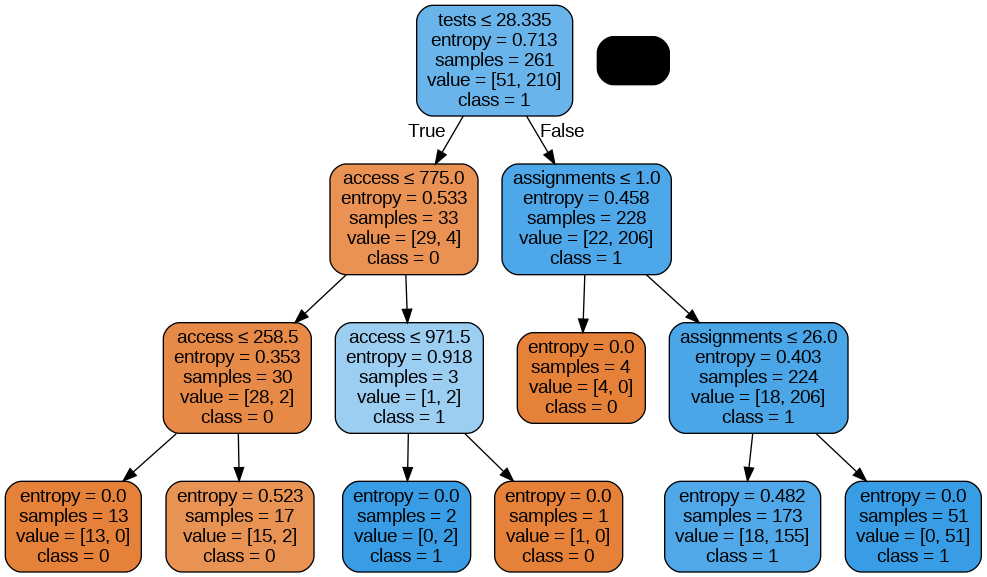

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = ['access', 'tests', 'assignments'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

##GAUSSIAN NAIVE BAYES

In [ ]:
# Importing packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import rcParams # plot size customization
rcParams['figure.figsize'] = (20, 10)

In [ ]:
pip install imbalanced-learn

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from numpy import where
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt # visualizations

In [ ]:
# Importing the data
train_data = pd.read_csv('DBS.csv', sep=';')
test_data = pd.read_csv('DBS_2020.csv', sep=';')
train_data.head()

,access,tests,tests_grade,exam,project,project_grade,assignments,result_points,result_grade,graduate,year,acad_year
0,1256,57.00,A,19,91.54,A,40.0,189.92,A,1,2019,2019/2020
1,985,42.87,B,19,75.96,A,13.7,189.43,A,1,2017,2017/2018
2,1455,54.50,A,16,96.79,A,40.0,188.91,A,1,2019,2019/2020
3,998,54.50,A,16,93.36,A,40.0,186.85,A,1,2019,2019/2020
4,1347,55.00,A,16,92.86,A,39.0,186.38,A,1,2019,2019/2020


In [ ]:
X_train = np.asarray(train_data[['access', 'tests', 'assignments']])
y_train = np.asarray(train_data['graduate'])

In [ ]:
X_test = np.asarray(test_data[['access', 'tests', 'assignments']])
y_test = np.asarray(test_data['graduate'])

### Data standardization with sklearn

In [ ]:
standardizer = StandardScaler()
model = GaussianNB(priors = None, var_smoothing = 1e-09)
# fit the model with the training data
model.fit(X_train,y_train)

GaussianNB()

### Evaluate pipeline

In [ ]:
from sklearn.naive_bayes import GaussianNB
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=4)
scores = cross_val_score(model, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.985


### Predictions

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))

Accuracy: 0.9166666666666666


In [ ]:
print(y_test)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0]


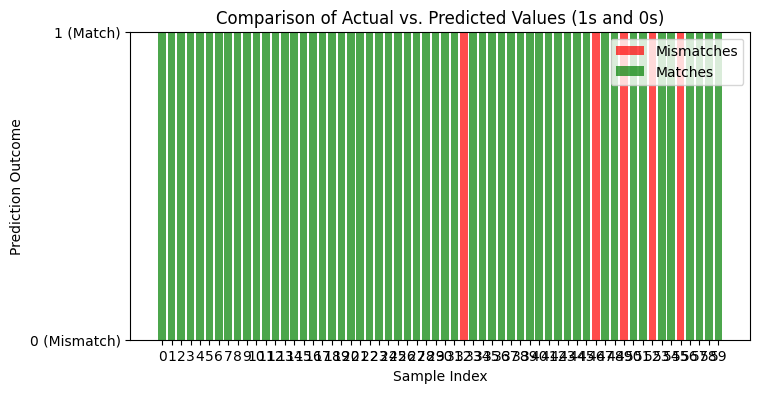

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample actual and predicted values (replace with your own)
y_test = np.array([1 ,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1 ,1 ,1 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0, 0, 0, 0, 0, 0])
predictions = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ,1 ,1, 1, 1, 1, 0, 1, 1, 1, 1,
 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

# Create an array to represent matches (where actual and predicted values are the same)
matches = (y_test == predictions)

# Create an array to represent mismatches
mismatches = (y_test != predictions)

# Calculate the total number of samples
total_samples = len(y_test)

# Calculate the number of matches and mismatches
num_matches = np.sum(matches)
num_mismatches = np.sum(mismatches)

# Create a stacked bar chart
plt.figure(figsize=(8, 4))
plt.bar(range(total_samples), mismatches, color='red', label='Mismatches', alpha=0.7)
plt.bar(range(total_samples), matches, color='green', label='Matches', bottom=mismatches, alpha=0.7)

# Customize the plot
plt.xlabel('Sample Index')
plt.ylabel('Prediction Outcome')
plt.title('Comparison of Actual vs. Predicted Values (1s and 0s)')
plt.xticks(range(total_samples))
plt.yticks([0, 1], ['0 (Mismatch)', '1 (Match)'])
plt.legend(loc='upper right')

# Show the plot
plt.show()

### Classificaton report

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.92      0.98      0.95        46

    accuracy                           0.92        60
   macro avg       0.91      0.85      0.87        60
weighted avg       0.92      0.92      0.91        60



Recall metric in the testing dataset: 97.82608695652173%


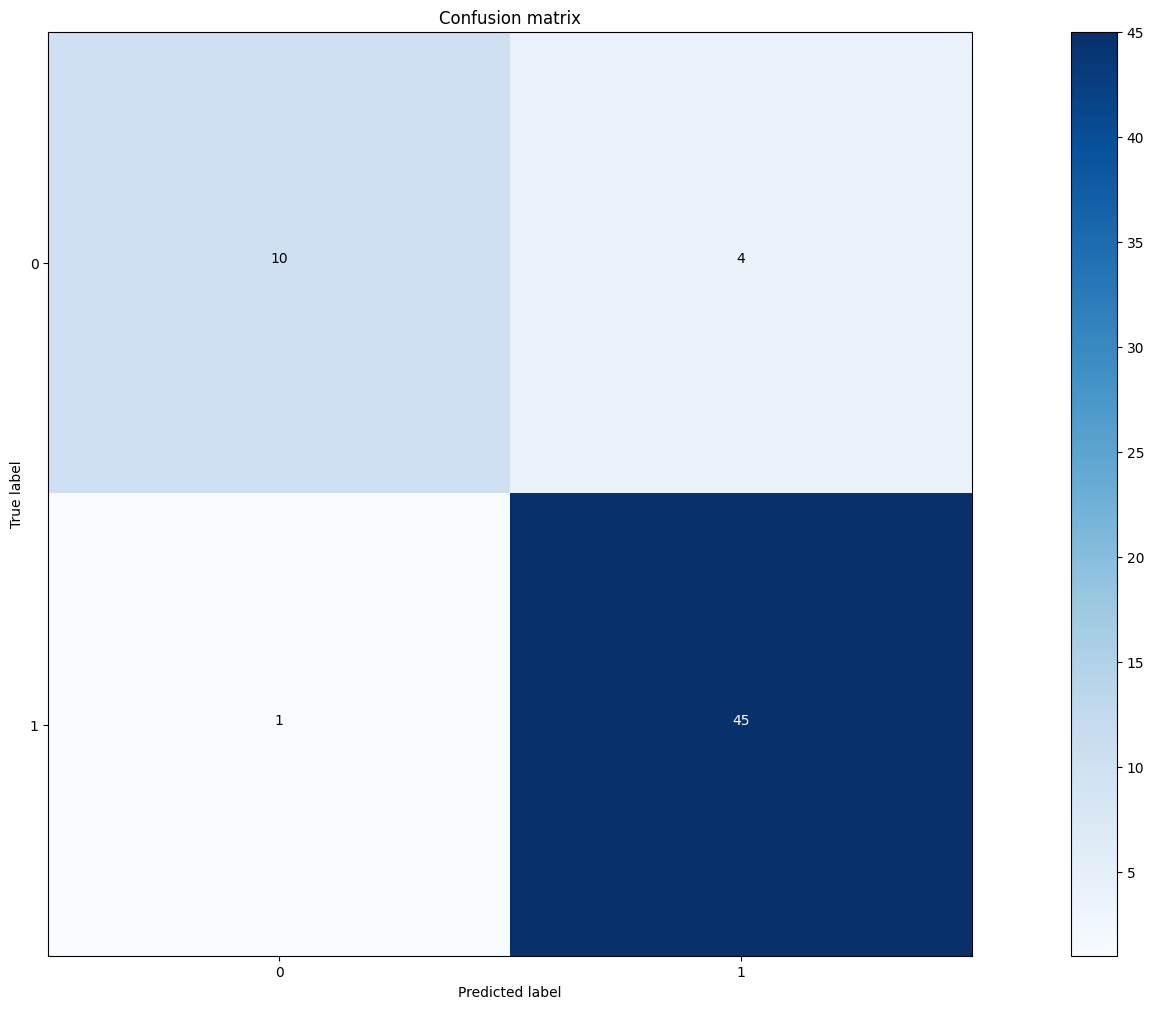

In [ ]:
# Confusion matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
y_pre = model.predict(X_test)

cnf_matrix = confusion_matrix(y_test, predictions)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [ ]:
# Predictions
yhat = model.predict(X_test)
yhat_prob = model.predict_proba(X_test)

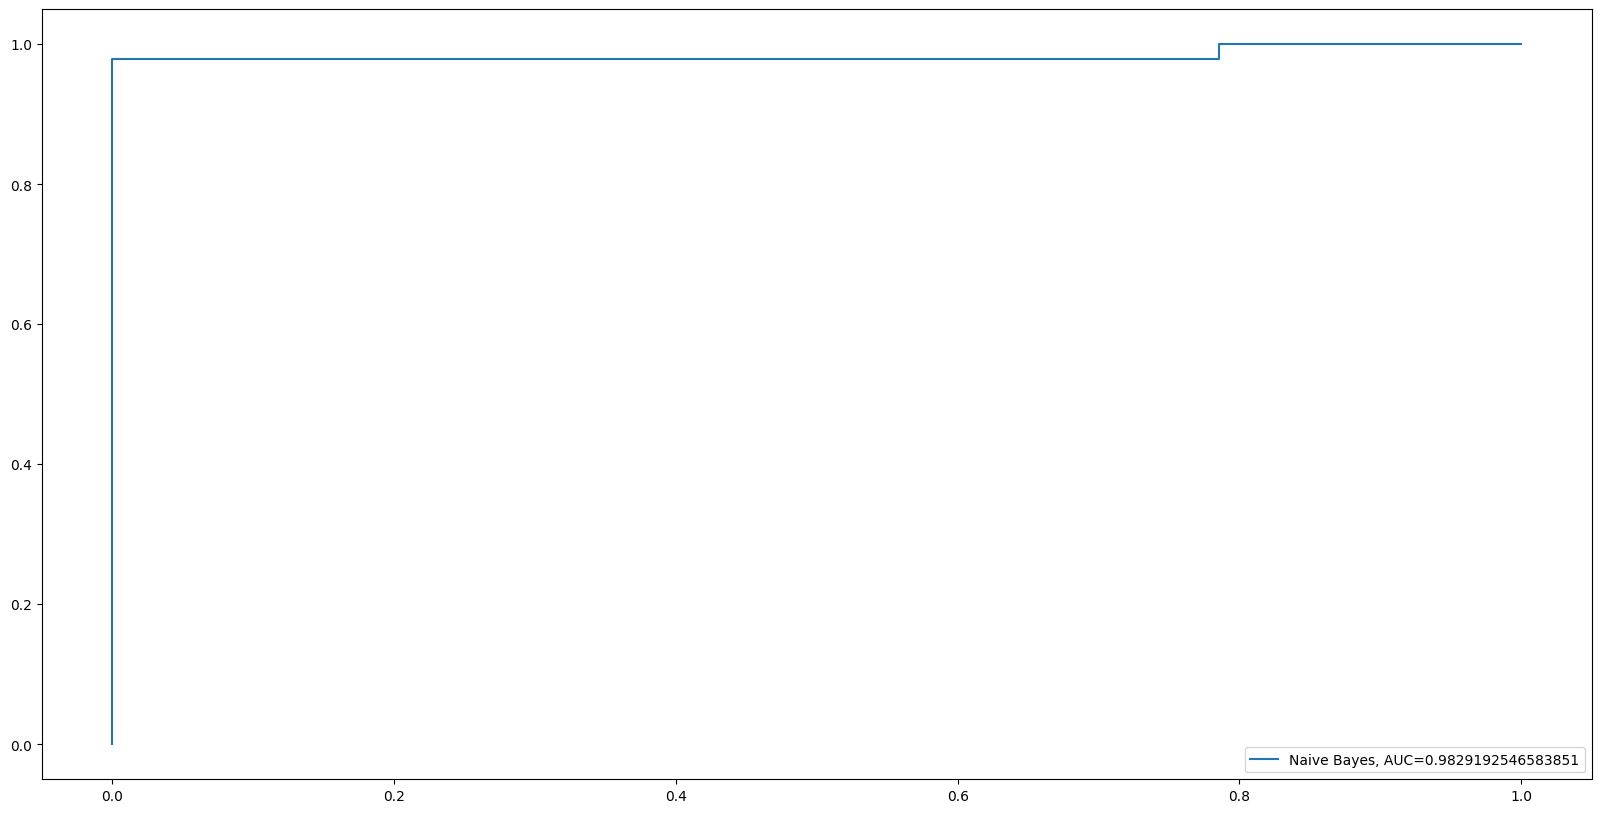

In [ ]:
# Import the metrics class
import sklearn.metrics as metrics
from matplotlib import pyplot as plt

y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Naive Bayes, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

##SVM

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(C=1.0, kernel='linear', degree=3, gamma='auto',probability=True)
svclassifier.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear', probability=True)

In [ ]:
#Evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
scores = cross_val_score(svclassifier, X_test, y_test, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.979


In [ ]:
# Predictions
yhat = svclassifier.predict(X_test)

In [ ]:
# Predictions
yhat_prob = svclassifier.predict_proba(X_test)

In [ ]:
# Classificaton report
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      0.29      0.44        14
           1       0.82      1.00      0.90        46

    accuracy                           0.83        60
   macro avg       0.91      0.64      0.67        60
weighted avg       0.86      0.83      0.80        60



In [ ]:
from sklearn.metrics import mean_absolute_error
def evaluate(svclassifier, x_scaled, y_test):
    predictions = svclassifier.predict(x_scaled)
    errors = abs(predictions - y_test)
    mape = mean_absolute_error(predictions, y_test)*100
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

In [ ]:
base_accuracy = evaluate(svclassifier, X_test, y_test)

Model Performance
Average Error: 0.1667 degrees.
Accuracy = 83.33%.


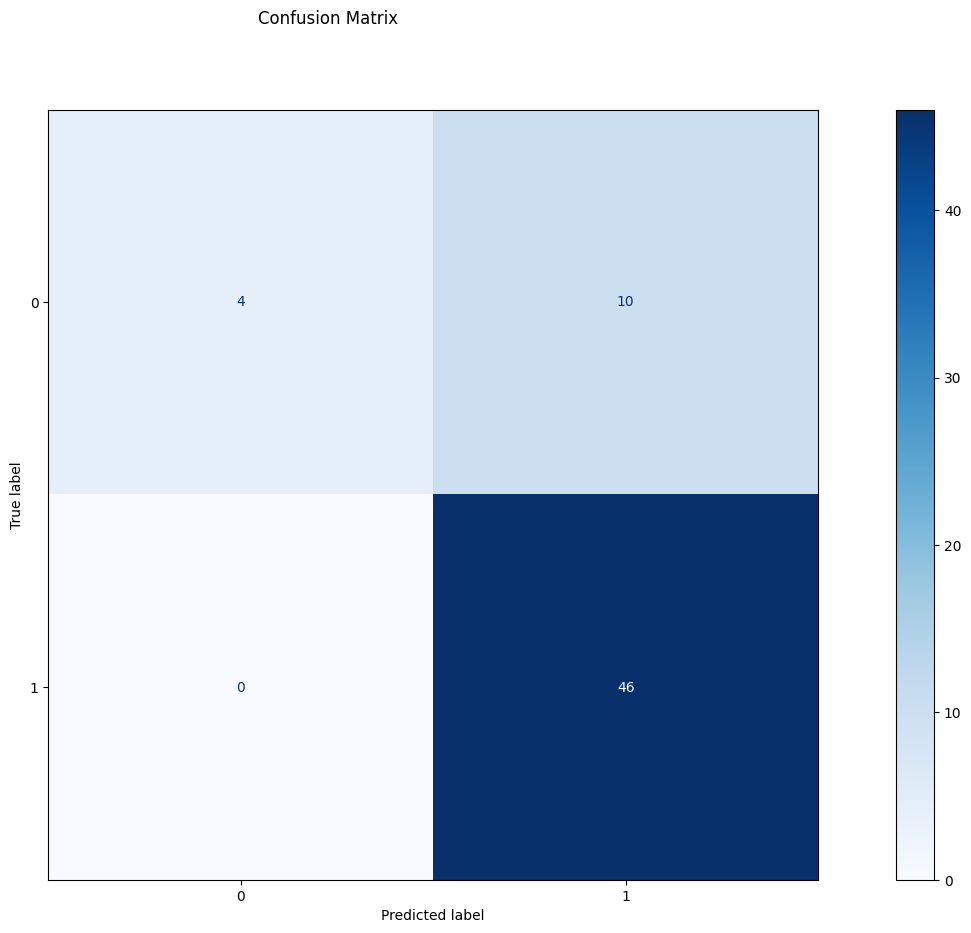

Confusion matrix:
[[ 4 10]
 [ 0 46]]


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Create the confusion matrix display with a custom colormap
dis = ConfusionMatrixDisplay.from_predictions(y_test, yhat, cmap=plt.cm.Blues)  # You can choose any other colormap

# Set the title
dis.figure_.suptitle("Confusion Matrix")

# Show the confusion matrix
plt.show()

# Print the confusion matrix
print(f"Confusion matrix:\n{dis.confusion_matrix}")

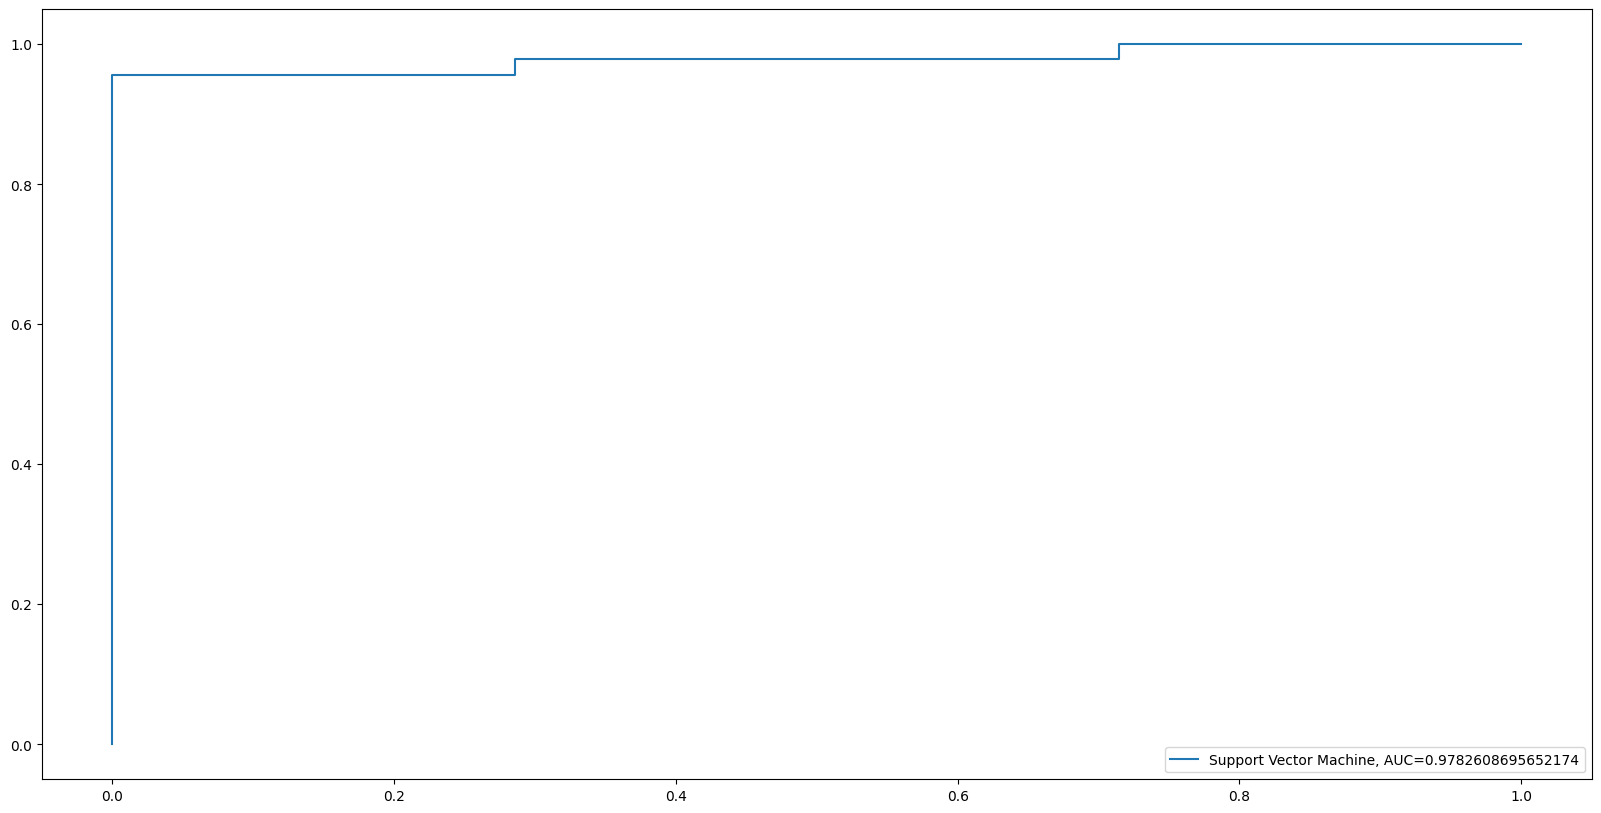

In [ ]:
# Import the metrics class
from sklearn import metrics
y_pred_proba = svclassifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Support Vector Machine, AUC="+str(auc))
plt.legend(loc=4)
plt.show()